In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
min_values = iris_df.groupby('target').min()
max_values = iris_df.groupby('target').max()
print(min_values)
print(max_values)

        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                     4.3               2.3                1.0   
1                     4.9               2.0                3.0   
2                     4.9               2.2                4.5   

        petal width (cm)  
target                    
0                    0.1  
1                    1.0  
2                    1.4  
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                     5.8               4.4                1.9   
1                     7.0               3.4                5.1   
2                     7.9               3.8                6.9   

        petal width (cm)  
target                    
0                    0.6  
1                    1.8  
2                    2.5  


In [7]:
pd.concat([min_values, max_values], keys=['min', 'max'])

sepal length (cm)  sepal width (cm)  petal length (cm)  \
    target                                                           
min 0                     4.3               2.3                1.0   
    1                     4.9               2.0                3.0   
    2                     4.9               2.2                4.5   
max 0                     5.8               4.4                1.9   
    1                     7.0               3.4                5.1   
    2                     7.9               3.8                6.9   

            petal width (cm)  
    target                    
min 0                    0.1  
    1                    1.0  
    2                    1.4  
max 0                    0.6  
    1                    1.8  
    2                    2.5

In [8]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
X = iris.data[:, [0, 1]]
y = iris.target

# vizualization dont work
#X=df.iloc[0:,0:2]
#y=df.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=4,test_size = 0.25)

Text(0, 0.5, 'Sepal width')

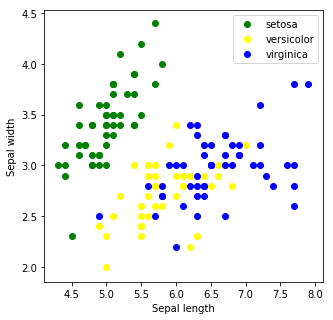

In [19]:
plt.figure(figsize=(5,5))

colors = ['green', 'yellow', 'blue']
for i in range(len(colors)):
   
    mask_x = X[y == i, 0] # take first column
    mask_y = X[y == i, 1] # take second column
    
    plt.scatter(mask_x, mask_y, c=colors[i]) # what do c
    
plt.legend(iris.target_names) # where do we take the target names from
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [12]:
knn = KNeighborsClassifier(n_neighbors=2)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [14]:
test_data = [1.6, 1.8]
knn.predict([test_data])

array([0])

In [15]:
#predict = ['setosa','versicolor','virginica']

#for i in range(len(predict)):
   # mask = y[:,1] == i
    #print(mask)

In [16]:
y_pred = knn.predict(X_test)
(y_pred != y_test).sum()

6

In [17]:
knn.score(X_test,y_test)

0.8421052631578947